## A full working example 

This example concerns the study of coked hierarchical zeolites.

In [1]:
from spectrochempy.api import *


        SpectroChemPy's API
        Version   : 0.1a2.post85
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


### Introduction

....


### Reading the data

The data, we will be processing come from the AGIR setup at the Laboratory LCS.

We have TGA (Thermogravimetric analysis) and IR (Infrared) data recorded simultaneously, for 3 samples recorded at 350°C :
P (parent), A (acid treatment), B (basic treatment)

The IR data have been exported as `csv` file (on file per spectra) and then zipped. Therefore, we will use the function `read_zip` to open the IR data. 

For the TGA data are in `csv` files, so we use `read_csv` to read them.

To keep the data easily accessible, we create a dictionary `samples`

In [3]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

In [ ]:
for key in samples.keys():
    samples[key]['IR'] = NDDataset.read_zip('agirdata/{}/FTIR/FTIR.zip'.format(key),
                                             directory=data, origin='omnic_export')

In [17]:
for key in samples.keys():
    ss = samples[key]['TGA'] = NDDataset.read_csv('agirdata/{}/TGA/tg.csv'.format(key), 
                                             directory=data)
    # lets keep only data from somrthing close to 0.
    s = samples[key]['TGA'] = ss[:, -0.5:60.0]
    
    # for TGA, some information are missing. 
    # we add them here
    s.x.units = 'hour'
    s.units = 'weight_percent' 
    s.x.title = 'Time on stream'
    s.title = 'Mass variation'

 WARNING | CoordWarning:  This coordinate (60.0) is outside the axis limits.
The closest limit index is returned


##### Plot of the raw IR data 

<IPython.core.display.Javascript object>


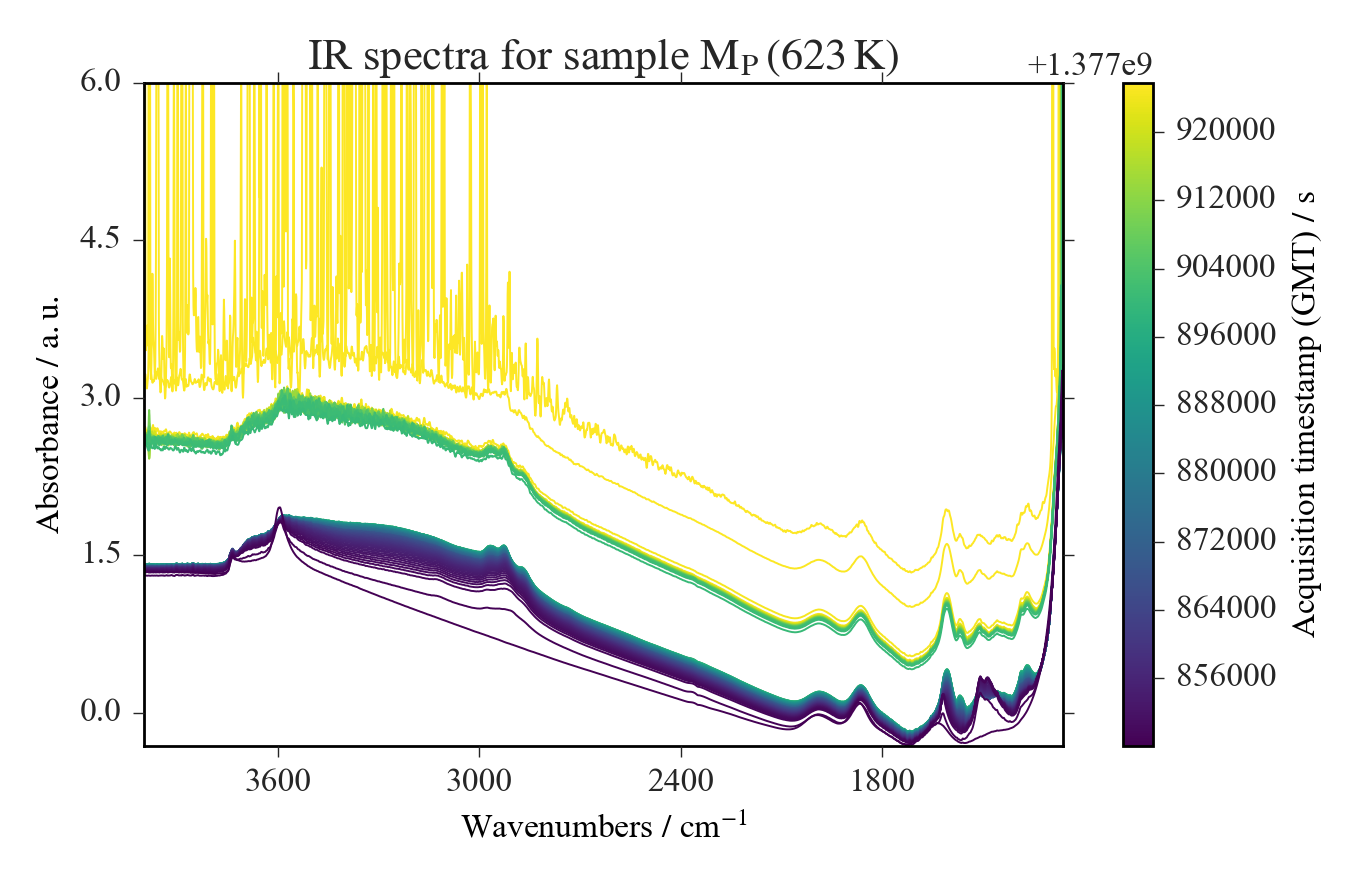

<IPython.core.display.Javascript object>


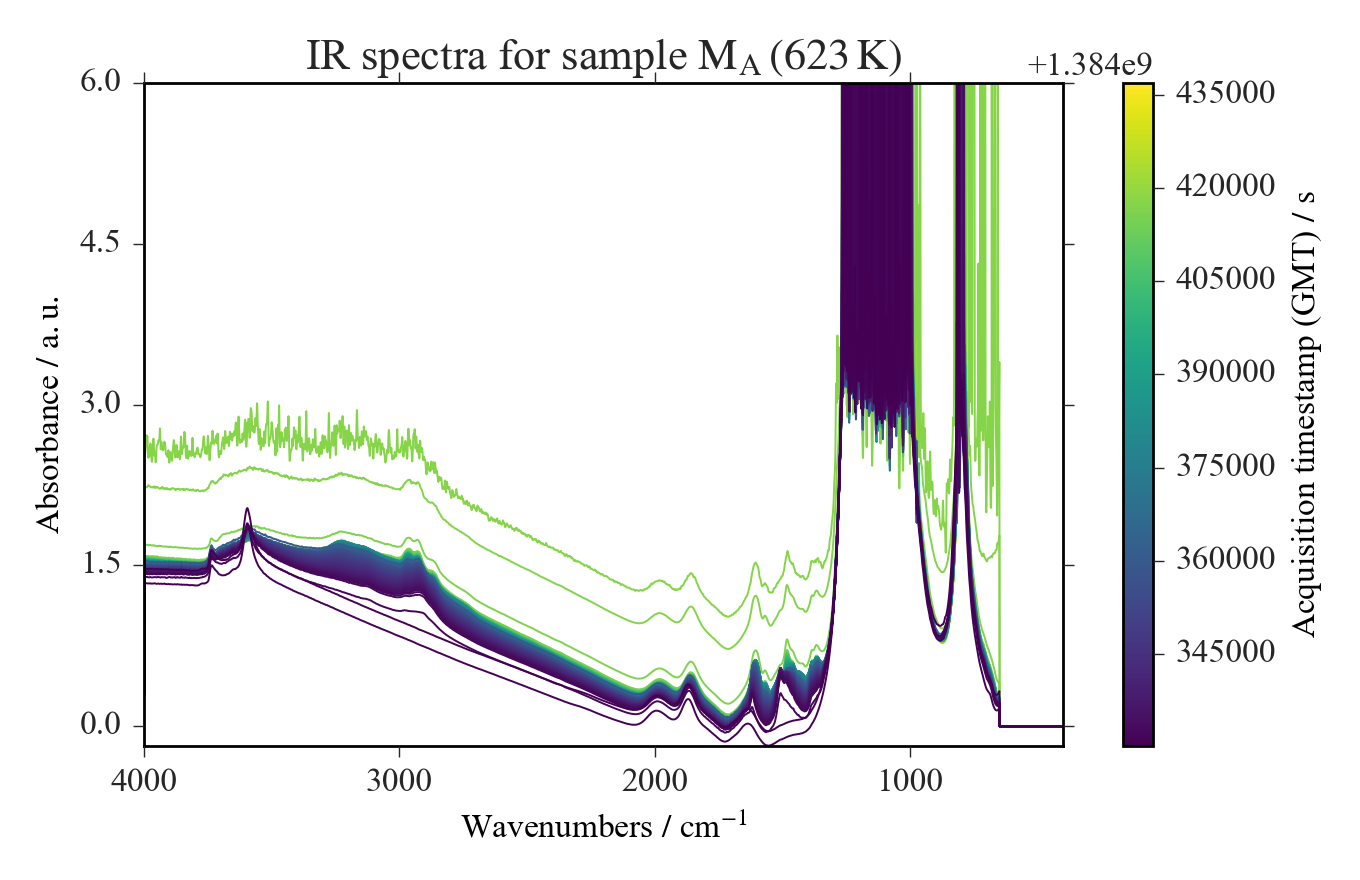

<IPython.core.display.Javascript object>


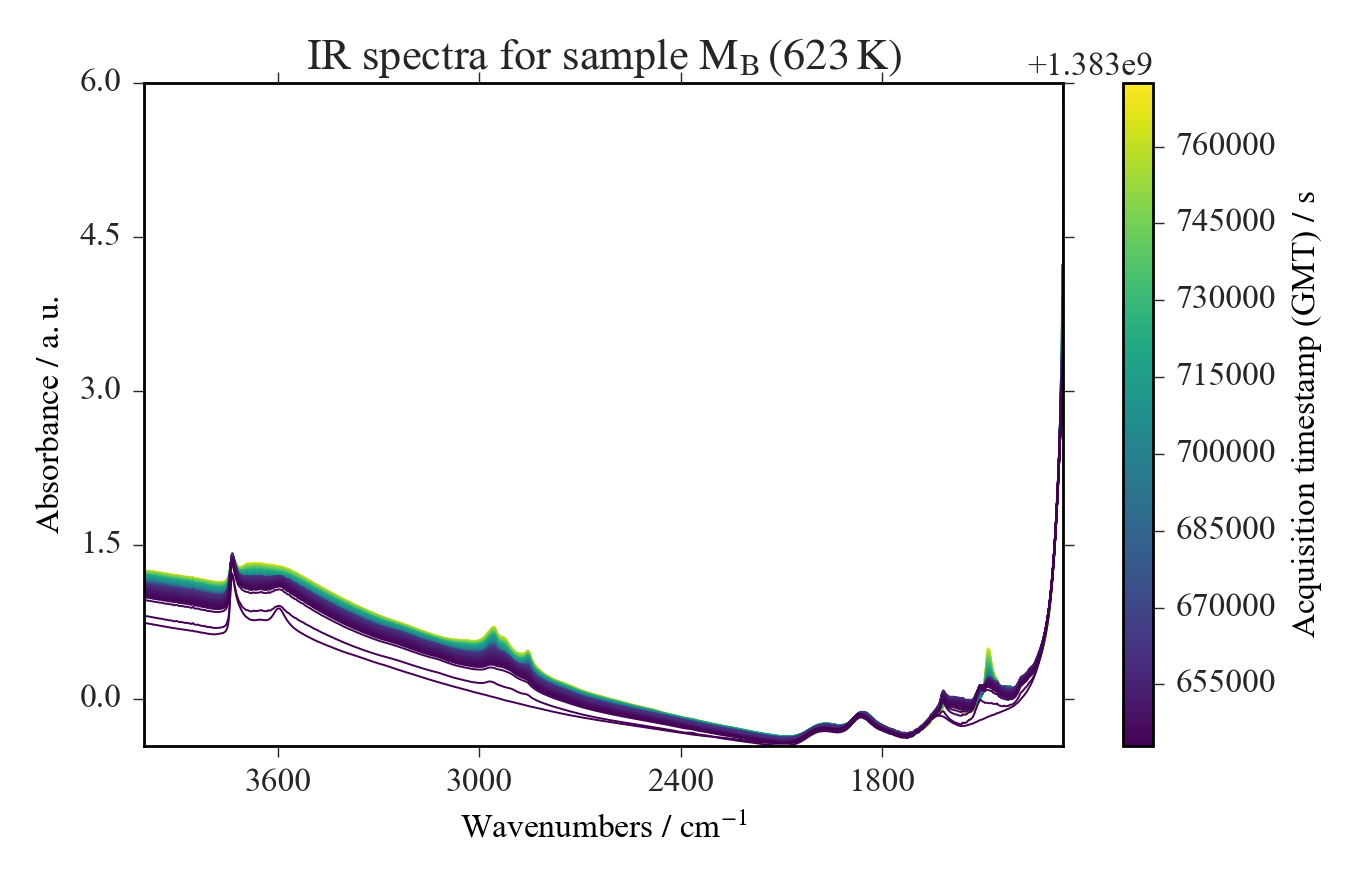

In [24]:
for key in samples.keys():
    figure()
    s = samples[key]['IR']
    s.plot(kind='stack')
    label = samples[key]['label']
    title = 'IR spectra for sample {}'.format(label)
    s.ax.set_title(title, fontsize=16)
    show()

<IPython.core.display.Javascript object>


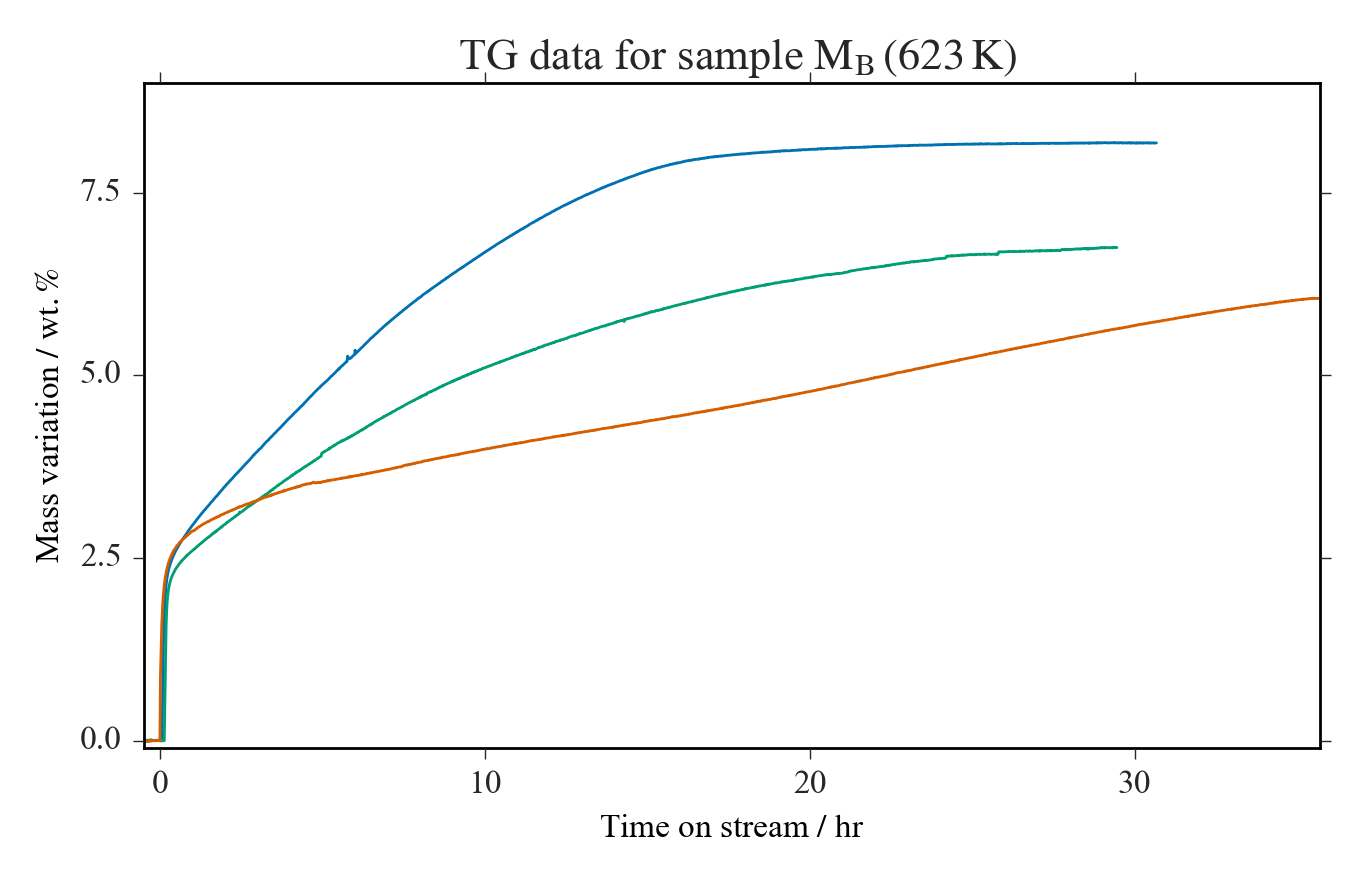

ERROR! Session/line number was not unique in database. History logging moved to new session 1061


In [19]:
figure()
# we will plot on the same figure
for key in samples.keys():
    s = samples[key]['TGA']
    s.plot_scatter(ylim=(-.1,9))
label = samples[key]['label']
title = ' TG data for sample {}'.format(label)
s.ax.set_title(title, fontsize=16)
show()